In [3]:
import tensorflow as tf
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

Found 3300 files belonging to 6 classes.
4/4 [==============================] - 13s 2s/step


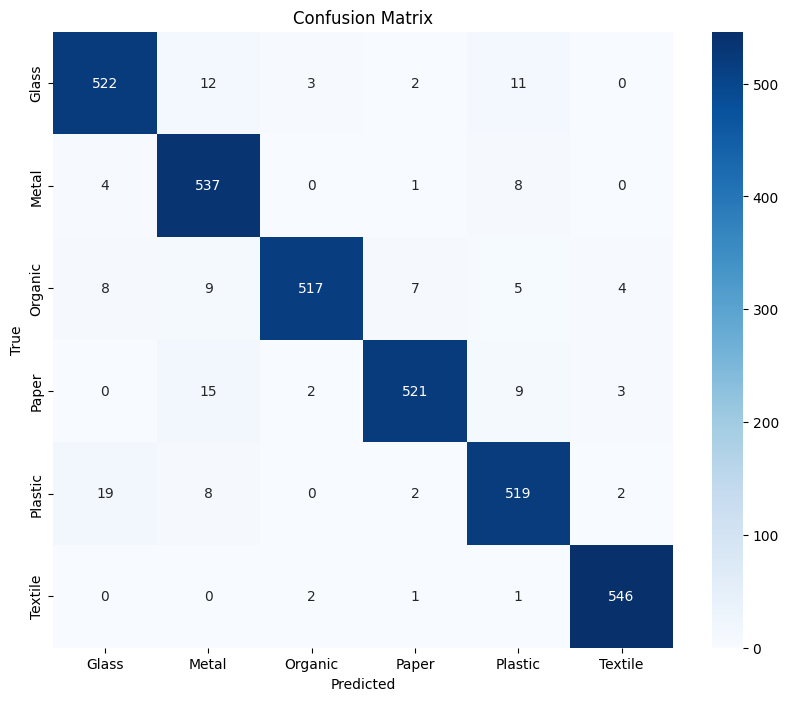

              precision    recall  f1-score   support

       Glass       0.94      0.95      0.95       550
       Metal       0.92      0.98      0.95       550
     Organic       0.99      0.94      0.96       550
       Paper       0.98      0.95      0.96       550
     Plastic       0.94      0.94      0.94       550
     Textile       0.98      0.99      0.99       550

    accuracy                           0.96      3300
   macro avg       0.96      0.96      0.96      3300
weighted avg       0.96      0.96      0.96      3300

4/4 [==============================] - 7s 2s/step


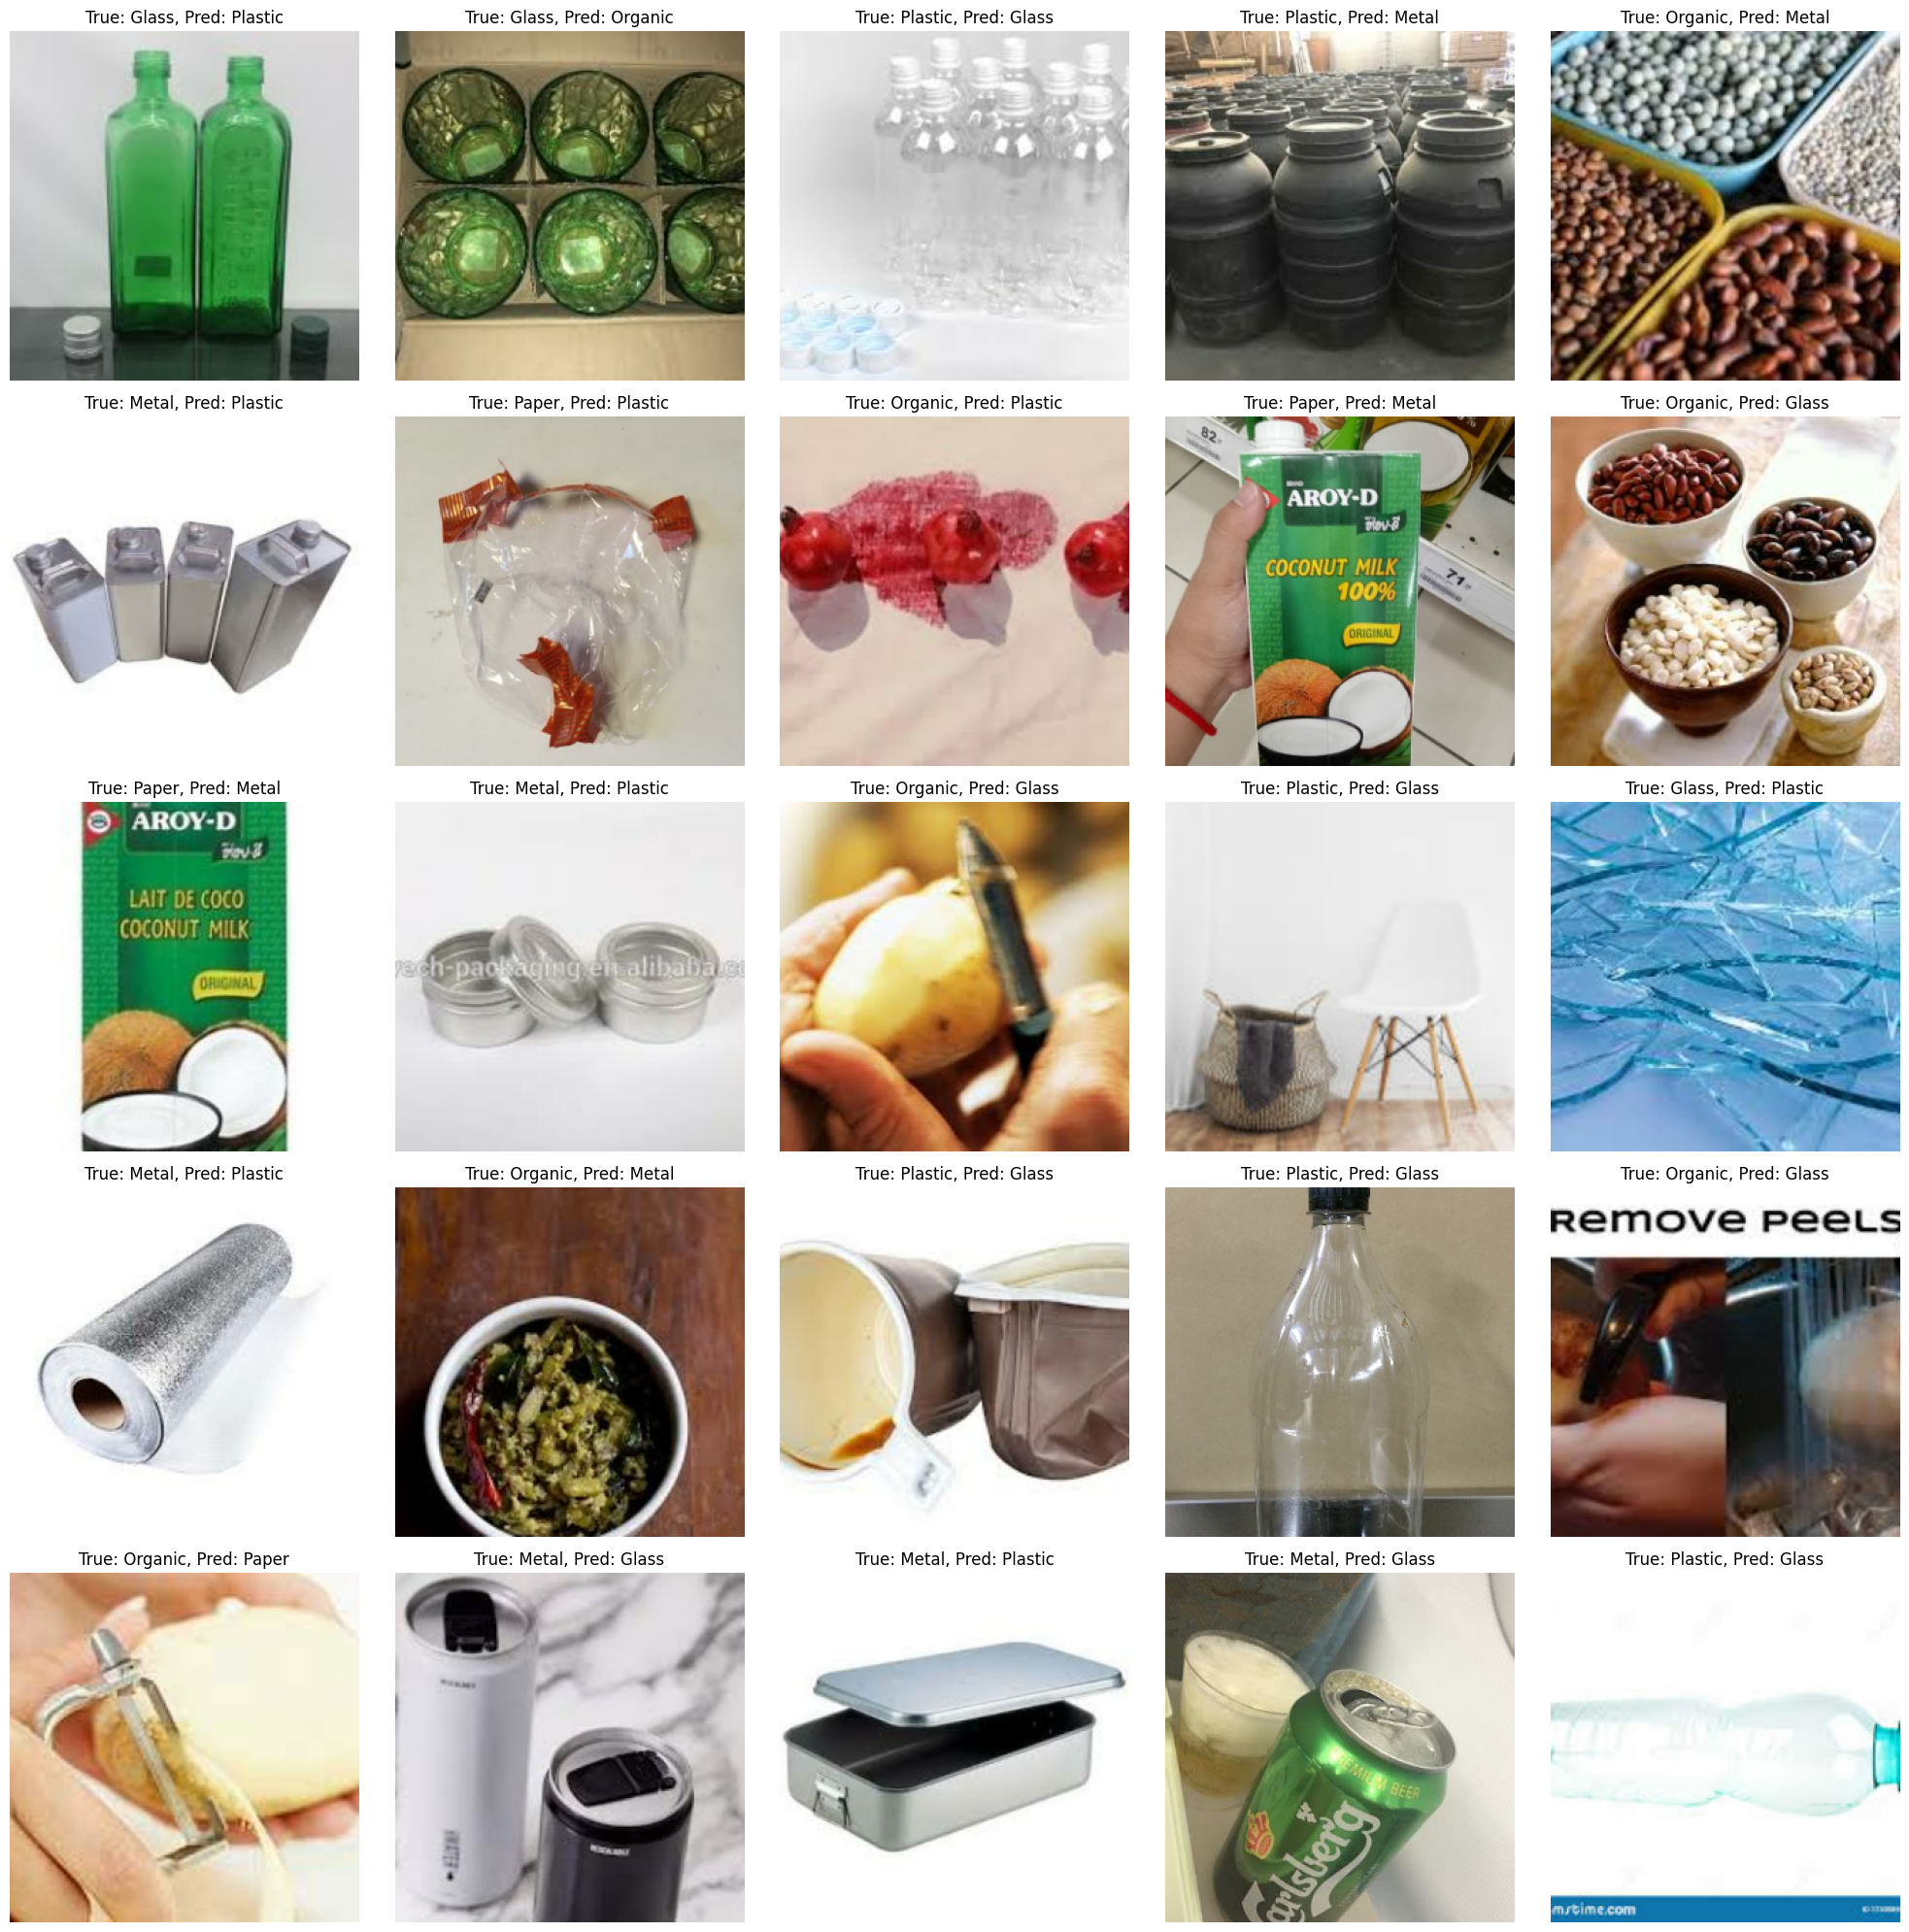

Total misklasifikasi: 138


In [4]:
# Muat model yang telah dilatih
model = tf.keras.models.load_model('D:/Temp/Kuliah/Skripsi/Coding/main/model.h5')

# Siapkan dataset pengujian (pastikan dataset ini telah diproses sama seperti saat pelatihan)
DIR = "D:/Temp/Kuliah/Skripsi/Coding/main/Data"
test_dataset = tf.keras.preprocessing.image_dataset_from_directory(DIR, seed=42, batch_size=128, smart_resize=True, image_size=(256, 256))

# Buat list untuk menyimpan label asli dan prediksi
true_labels = []
predicted_labels = []

# Lakukan prediksi dan simpan hasilnya
for images, labels in test_dataset:
    preds = model.predict(images)
    predicted_labels.extend(np.argmax(preds, axis=1))
    true_labels.extend(labels.numpy())

# Hitung confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=test_dataset.class_names, yticklabels=test_dataset.class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Tampilkan classification report
print(classification_report(true_labels, predicted_labels, target_names=test_dataset.class_names))

# Buat folder untuk menyimpan gambar yang salah klasifikasi (opsional)
misclassified_dir = "misclassified_images"
if not os.path.exists(misclassified_dir):
    os.makedirs(misclassified_dir)

# List untuk menyimpan informasi gambar yang salah klasifikasi
misclassified_images = []

# Periksa dan simpan gambar yang salah klasifikasi
for batch, (images, labels) in enumerate(test_dataset):
    preds = model.predict(images)
    predicted = np.argmax(preds, axis=1)
    
    for i in range(len(images)):
        true_label = labels[i].numpy()
        predicted_label = predicted[i]
        if true_label != predicted_label:  # Jika salah klasifikasi
            misclassified_images.append((images[i].numpy(), true_label, predicted_label))
            # Simpan gambar ke folder (opsional)
            img_path = os.path.join(misclassified_dir, f"batch{batch}_img{i}_true{true_label}_pred{predicted_label}.png")
            plt.imsave(img_path, images[i].numpy().astype("uint8"))

# Tampilkan gambar yang salah klasifikasi
plt.figure(figsize=(20, 20))
num_images = len(misclassified_images)
for i, (img, true_label, pred_label) in enumerate(misclassified_images):
    if i >= 25:  # Maksimal 25 gambar ditampilkan untuk menjaga visualisasi
        break
    plt.subplot(5, 5, i + 1)
    plt.imshow(img.astype("uint8"))
    plt.title(f"True: {test_dataset.class_names[true_label]}, Pred: {test_dataset.class_names[pred_label]}")
    plt.axis("off")
plt.tight_layout()
plt.show()

# Informasi total misklasifikasi
print(f"Total misklasifikasi: {num_images}")

Accuracy per Class:
Glass: 94.91%
Metal: 97.64%
Organic: 94.00%
Paper: 94.73%
Plastic: 94.36%
Textile: 99.27%


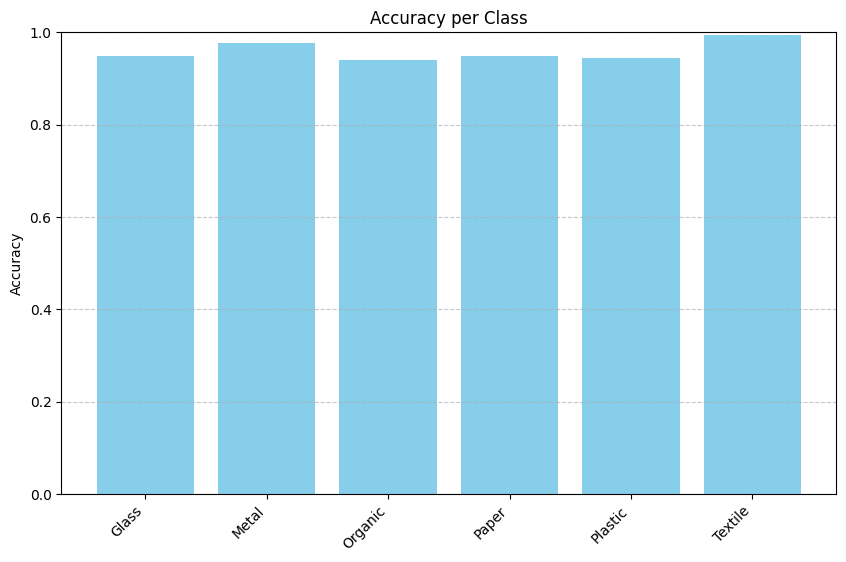

In [5]:
from sklearn.metrics import confusion_matrix, classification_report

# Hitung confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

# Hitung akurasi per kelas
class_accuracies = {}
class_names = test_dataset.class_names
for i, class_name in enumerate(class_names):
    true_positive = cm[i, i]  # Prediksi benar untuk kelas ini
    total_samples = cm[i].sum()  # Total sampel untuk kelas ini
    accuracy = true_positive / total_samples if total_samples > 0 else 0
    class_accuracies[class_name] = accuracy

# Tampilkan akurasi per kelas
print("Accuracy per Class:")
for class_name, accuracy in class_accuracies.items():
    print(f"{class_name}: {accuracy:.2%}")

# Plot akurasi per kelas
plt.figure(figsize=(10, 6))
plt.bar(class_accuracies.keys(), class_accuracies.values(), color='skyblue')
plt.xticks(rotation=45, ha="right")
plt.ylabel("Accuracy")
plt.title("Accuracy per Class")
plt.ylim(0, 1)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()
